In [1]:
import numpy as np
np.random.seed(45)
x1 = np.random.multivariate_normal([-2, -2], [[1,0],[0,1]], 50)
x2 = np.random.multivariate_normal([2, -2], [[0.5,0],[0,0.5]], 50)
x3 = np.random.multivariate_normal([2, 3], [[1.,0],[0,1.5]], 50)
x = np.concatenate([x1,x2,x3],axis=0)

In [2]:
x.shape

(150, 2)

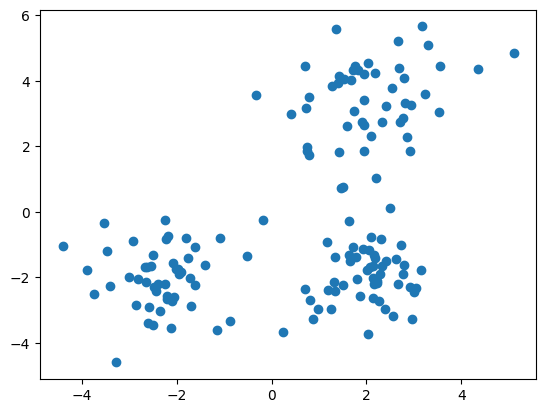

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x[:, 0], x[:, 1])

In [4]:
K = 3  # TODO implement the elbow method of finding K

In [5]:
class KMeans():
    def __init__(self, n_clusters: int, x):
        self.n_clusters = n_clusters
        self.x = x
        self.idx = np.arange(self.x.shape[0])
    
    def set_intial_centroids(self):
        cent_idx = []
        while (len(cent_idx) < self.n_clusters):
            idx = np.random.choice(self.idx)
            if idx not in cent_idx:
                cent_idx.append(idx)
        return [x[cent_idx[kk]] for kk in range(self.n_clusters)]
    
#         random_idx = np.random.choice(np.arange(self.x.shape[0]), size=self.n_clusters)
#         return self.x[random_idx]
        
    def assign_clusterss(self):
        self.clusters = [np.empty((0,2)) for kk in range(self.n_clusters)]
        
        for point in self.x:
            all_dist = []
            for mu in self.centroids:
                temp = point - mu
                dist = np.sqrt(np.dot(temp.T, temp))
                all_dist.append(dist)
            cc = all_dist.index(min(all_dist))
            self.clusters[cc] = np.vstack([self.clusters[cc], point])
    
    def reset_centroids(self):
        temp = [np.mean(xx, axis=0) for xx in self.clusters]
        self.centroids = temp
        return self.centroids
    
    def calc_distortion(self):
        sum = 0
        for kk in range(self.n_clusters):
            big_mu = np.outer(np.ones(len(self.clusters[kk])), self.centroids[kk])
            temp = self.clusters[kk] - big_mu
            sum += (temp*temp).sum()
        return sum/len(self.x)
    
    def plot_clusters(self):
        plt.figure()
        for kk in range(self.n_clusters):
            plt.scatter(self.clusters[kk][:, 0], self.clusters[kk][:, 1])
            plt.scatter(self.centroids[kk][0], self.centroids[kk][1], color='k')
    
    def fit(self):
        self.centroids = self.set_intial_centroids()
        check = True
        while check:
            old_centroids = self.centroids
            self.assign_clusterss()
            self.plot_clusters()
            new_centroids = self.reset_centroids()
            if all([(new_centroids[kk] == old_centroids[kk]).all() for kk in range(self.n_clusters)]):
                check = False
        

[(54, 2), (48, 2), (48, 2)]
[array([ 1.94271069, -1.83192401]), array([-2.34411099, -2.03237359]), array([2.08534108, 3.48827318])]
distortion = 1.6874217330799717


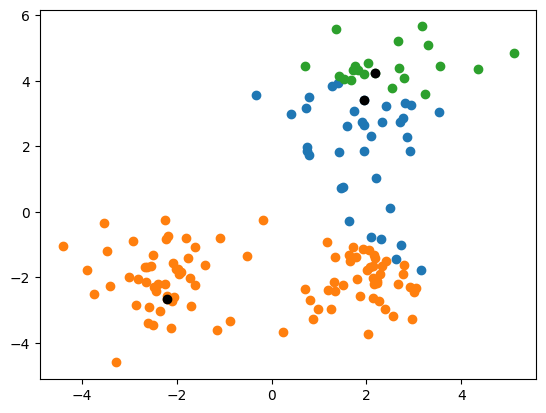

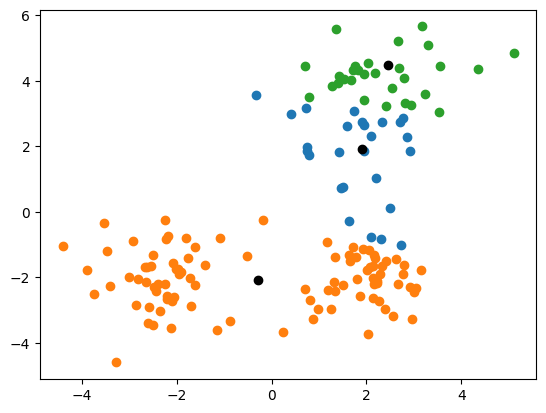

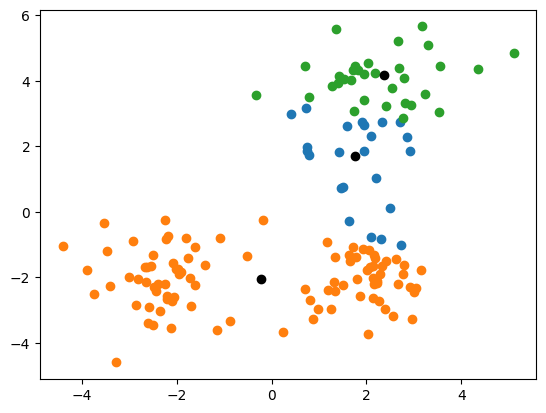

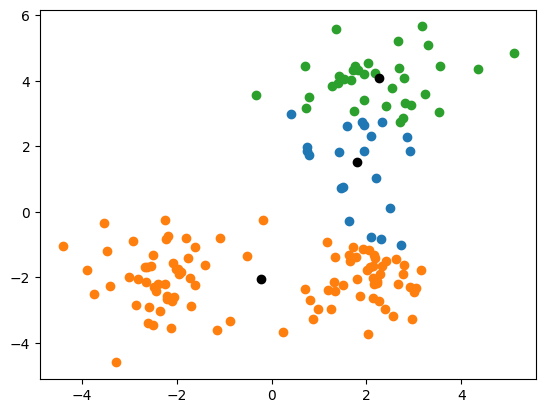

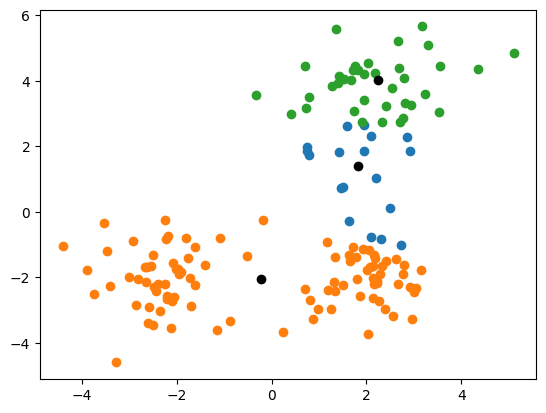

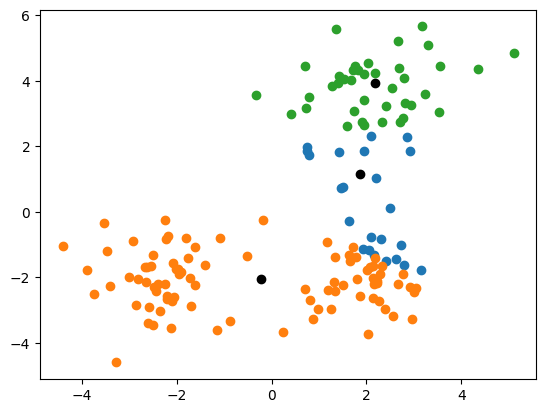

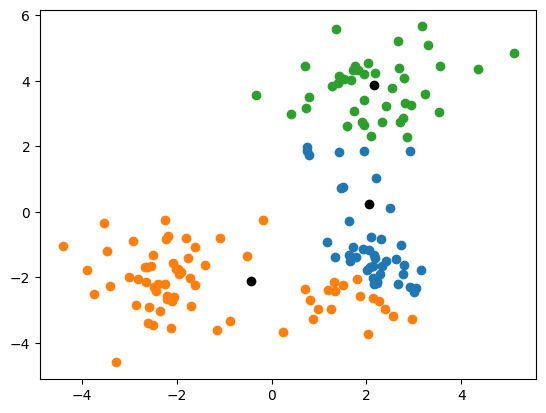

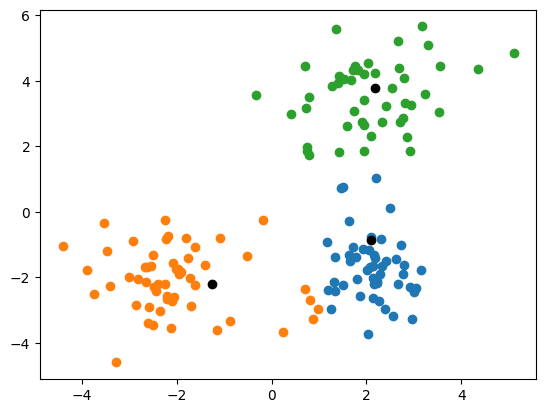

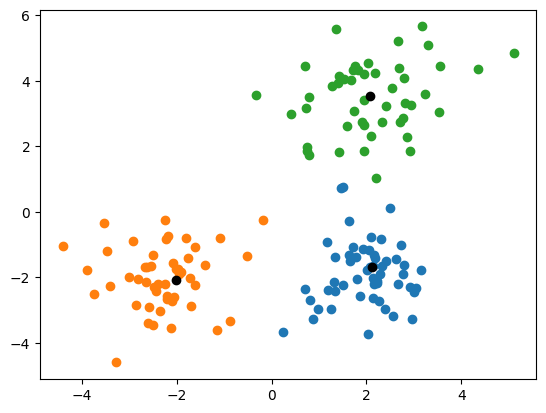

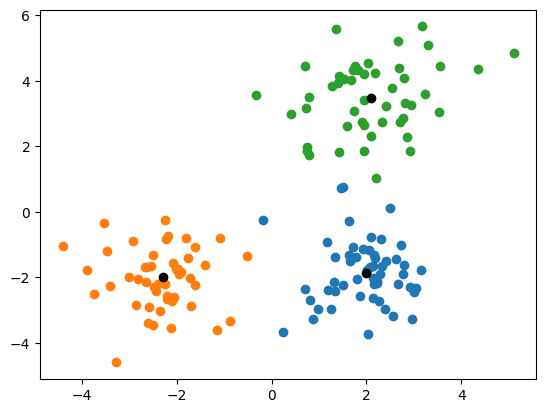

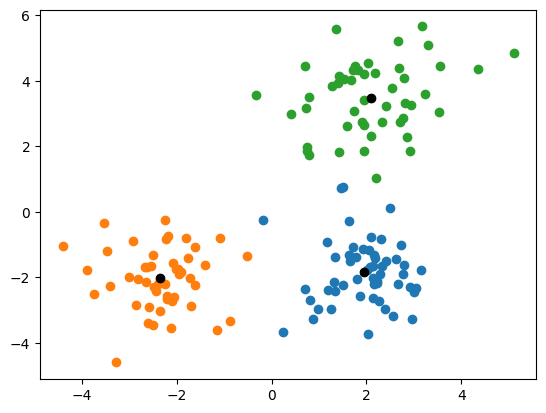

In [6]:
km = KMeans(K, x)
km.fit()
# print(km.clusters)
print([km.clusters[cc].shape for cc in range(len(km.clusters))])
print(km.centroids)
print(f"distortion = {km.calc_distortion()}")

In [ ]:
# F- I-- N---